In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from collections import Counter
from random import sample
import cv2
import os
import numpy as np

In [2]:
# loading the images data 
labels = ['healthy', 'tumor']
img_size = 120
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
# Mount drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load training images 
train = get_data(os.getcwd() + '/drive/MyDrive/images/training_set/')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [5]:
# Load validation images 
val = get_data(os.getcwd() + '/drive/MyDrive/images/training_set/')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [6]:
# load testing images
test = get_data(os.getcwd() + '/drive/MyDrive/images/test_set/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [7]:
# same as get_data but return a normal array, to be used for validation random sampling (instead of sampling the multidimensional numpy array)
def get_data2(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data

In [8]:
val = get_data2(os.getcwd() + '/drive/MyDrive/images/training_set/')

In [9]:
valtemp=np.array(sample(val,int(len(val)*0.2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [10]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in valtemp:
    x_val.append(feature)
    y_val.append(label)


for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)
    


datagen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(120, 120, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

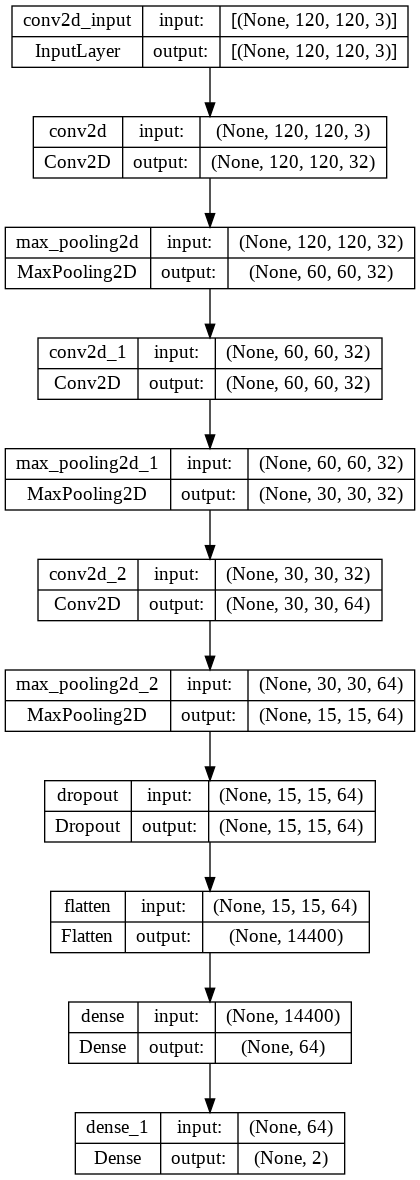

In [36]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [13]:
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


102/102 [==============================] - 83s 805ms/step - loss: 0.5475 - accuracy: 0.7152 - val_loss: 0.4251 - val_accuracy: 0.8426
Epoch 2/10
102/102 [==============================] - 78s 753ms/step - loss: 0.3839 - accuracy: 0.8360 - val_loss: 0.2364 - val_accuracy: 0.9213
Epoch 3/10
102/102 [==============================] - 86s 849ms/step - loss: 0.2340 - accuracy: 0.9081 - val_loss: 0.1319 - val_accuracy: 0.9583
Epoch 4/10
102/102 [==============================] - 88s 863ms/step - loss: 0.1846 - accuracy: 0.9334 - val_loss: 0.0712 - val_accuracy: 0.9799
Epoch 5/10
102/102 [==============================] - 91s 897ms/step - loss: 0.1045 - accuracy: 0.9609 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 6/10
102/102 [==============================] - 90s 880ms/step - loss: 0.0896 - accuracy: 0.9633 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 7/10
102/102 [==============================] - 70s 691ms/step - loss: 0.0518 - accuracy: 0.9812 - val_loss: 0.0336 - val_accuracy: 0.9

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

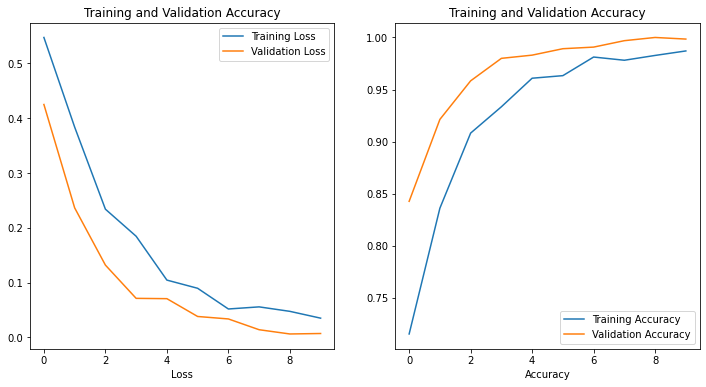

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.xlabel('Loss');
plt.title('Training and Validation Accuracy')
plt.subplot(1,2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(loc='lower right');
plt.title('Training and Validation Accuracy')
plt.show()


In [32]:
predictions = model.predict(x_test, verbose = 1)

43/43 [==============================] - 7s 165ms/step


In [33]:
predictions_ = []
for i in predictions:
  if i [1] >= 0.5:
    predictions_.append(1)
  else:
    predictions_.append(0)

In [34]:
# Evaluate model predictions against true labels.
stats = Counter()
for (x,y) in zip(predictions_, y_test):
  if x == y == 1:
    stats['TP'] += 1
  elif x == y == 0:
    stats['TN'] += 1
  elif x == 0 and y == 1:
    stats['FN'] += 1
  elif x == 1 and y == 0:
    stats['FP'] += 1

In [35]:
# Check stats.
print("The test-accuracy is {:.4f}".format(
    (stats.get('TP') + stats.get('TN'))/(stats.get('TP') + stats.get('TN') + stats.get('FP') + stats.get('FN'))))

print("The test-precision is {:.4f}".format(
    stats.get('TP')/(stats.get('TP') + stats.get('FP'))))

print("The test-recall is {:.4f}".format(
    stats.get('TP')/(stats.get('TP') + stats.get('FN'))))

print("The test-specificity is {:.4f}".format(
    stats.get('TN')/(stats.get('FP') + stats.get('TN'))))

print("The test-sensitivity is {:.4f}".format(
    stats.get('TP')/(stats.get('TP') + stats.get('FN'))))


The test-accuracy is 0.9617
The test-precision is 0.9847
The test-recall is 0.9453
The test-specificity is 0.9819
The test-sensitivity is 0.9453


--------------------------------------------------------------------------